In [1]:
# fasttext, w2v, GloVe

In [2]:
# use: everything except word and token length

In [3]:
import pandas as pd
import nltk
from nltk import pos_tag
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import statistics
import random
from sklearn.utils import resample
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
# get the df with the posts, tokenized posts, birth years, and binary birth years
df_birth_year = pd.read_csv('data/birth_year.csv')
mil_and_genz = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]
mil_and_genz['binary_birth_year'] = 1
mil_and_genz.loc[(1996 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 2006), 'binary_birth_year'] = 0
mil_and_genz = mil_and_genz.reset_index(drop=True)
mil_and_genz

<ipython-input-4-114eccf57dcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_and_genz['binary_birth_year'] = 1
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,auhtor_ID,post,birth_year,binary_birth_year
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0
...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1


In [5]:
# underample the minority class
undersampled_df = pd.concat([
    resample(mil_and_genz[mil_and_genz['binary_birth_year'] == 1],
             replace=False,
             n_samples=len(mil_and_genz[mil_and_genz['binary_birth_year'] == 0]),
             random_state=42),
    mil_and_genz[mil_and_genz['binary_birth_year'] == 0]
])

# shuffle the dataframe
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

undersampled_df

,auhtor_ID,post,birth_year,binary_birth_year
0,t2_3oxdhcdy,is a very American mentality. I've watched a v...,1999,0
1,t2_4o0e0ner,And if my boyfriend weren't monogamous then ma...,1996,1
2,t2_15bomb,American exceptionalism. We French made a lot ...,1998,0
3,t2_4qtxj,scenario B we spend more money between 8AM and...,1997,0
4,t2_tyhwo4v,true. I was grateful for that. Ikr? It was lik...,1997,0
...,...,...,...,...
19799,t2_5ujseot0,my opinion. She is kinda average. I just don’t...,1998,0
19800,t2_kemu5,be special and different and stand out. She's ...,1997,0
19801,t2_cleyisl8,all and knows nothing is probably the smarter ...,1995,1
19802,t2_wepe1,because it's just a tool. Just like learning h...,1987,1


In [6]:
# tokenization
mil_and_genz['post_tokenized'] = mil_and_genz.post.str.findall('\w+|[^\w\s]')
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,..."
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei..."
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too..."
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,..."
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your..."
...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p..."
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ..."
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der..."
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ..."


In [7]:
# document length
def count_words(tokens):
    return sum(1 for token in tokens if token.isalpha())
mil_and_genz['doc_length'] = mil_and_genz['post_tokenized'].apply(count_words)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552
...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504


In [8]:
# number of sentences
mil_and_genz['nr_sent'] = [len(nltk.sent_tokenize(text)) for text in mil_and_genz['post']]
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89
...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96


In [9]:
# sentence length
mil_and_genz['avg_sentence_length'] = mil_and_genz['post'].apply(lambda text:
    sum(1 for sentence in sent_tokenize(text) for word in word_tokenize(sentence) if word.isalpha()) /
    max(1, len(sent_tokenize(text)))
)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent,avg_sentence_length
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79,18.746835
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95,15.694737
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83,17.879518
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83,17.879518
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89,16.730337
...,...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62,16.935484
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122,11.926230
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108,13.407407
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96,15.114583


In [10]:
# still need to do stopwords, punctuation, and POS tagging.
# just say for every important word/tag/symbol make diff col and count nr times it is present?

In [12]:
# pos tag
def get_pos_tags(tokenized_post):
    pos_tags = pos_tag(tokenized_post) # maybe test .isaplha() ???
    pos_counts = {}
    for _, tag in pos_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1
    return pos_counts

# Apply the function to each post in the DataFrame
mil_and_genz['pos_tags'] = mil_and_genz['post_tokenized'].apply(get_pos_tags)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent,avg_sentence_length,pos_tags
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79,18.746835,"{'JJ': 104, 'IN': 172, 'PRP': 133, 'VBG': 48, ..."
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95,15.694737,"{'MD': 30, 'VB': 104, 'TO': 53, 'DT': 129, 'NN..."
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83,17.879518,"{'NNS': 86, 'IN': 169, 'PRP$': 55, 'NN': 223, ..."
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83,17.879518,"{'PRP$': 44, 'NN': 233, '.': 83, 'EX': 5, ''''..."
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89,16.730337,"{'NN': 246, '.': 88, 'IN': 175, 'DT': 125, 'NN..."
...,...,...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62,16.935484,"{'RB': 49, 'JJ': 108, 'NN': 177, 'IN': 130, 'D..."
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122,11.926230,"{'NNP': 273, '.': 127, 'NN': 484, 'PRP': 74, '..."
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108,13.407407,"{'NNP': 307, 'NN': 451, 'IN': 89, 'JJ': 150, '..."
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96,15.114583,"{'DT': 14, '.': 98, ':': 59, ')': 14, 'IN': 52..."


In [23]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
pos_tags_features = pd.DataFrame(vec.fit_transform(mil_and_genz['pos_tags']), columns=vec.get_feature_names())
mil_and_genz = pd.concat([mil_and_genz, pos_tags_features], axis=1)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent,avg_sentence_length,pos_tags,count_a,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79,18.746835,"{'JJ': 104, 'IN': 172, 'PRP': 133, 'VBG': 48, ...",31,...,31.0,48.0,25.0,61.0,56.0,6.0,13.0,0.0,16.0,0.0
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95,15.694737,"{'MD': 30, 'VB': 104, 'TO': 53, 'DT': 129, 'NN...",24,...,32.0,45.0,16.0,67.0,38.0,5.0,13.0,0.0,13.0,0.0
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83,17.879518,"{'NNS': 86, 'IN': 169, 'PRP$': 55, 'NN': 223, ...",33,...,43.0,47.0,20.0,59.0,41.0,3.0,9.0,0.0,18.0,0.0
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83,17.879518,"{'PRP$': 44, 'NN': 233, '.': 83, 'EX': 5, ''''...",36,...,41.0,40.0,21.0,71.0,41.0,4.0,10.0,0.0,15.0,0.0
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89,16.730337,"{'NN': 246, '.': 88, 'IN': 175, 'DT': 125, 'NN...",47,...,32.0,36.0,19.0,66.0,47.0,9.0,16.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62,16.935484,"{'RB': 49, 'JJ': 108, 'NN': 177, 'IN': 130, 'D...",21,...,19.0,30.0,13.0,52.0,30.0,3.0,7.0,0.0,9.0,0.0
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122,11.926230,"{'NNP': 273, '.': 127, 'NN': 484, 'PRP': 74, '...",20,...,61.0,15.0,16.0,24.0,26.0,0.0,1.0,0.0,8.0,0.0
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108,13.407407,"{'NNP': 307, 'NN': 451, 'IN': 89, 'JJ': 150, '...",18,...,56.0,9.0,7.0,54.0,24.0,1.0,5.0,0.0,13.0,0.0
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96,15.114583,"{'DT': 14, '.': 98, ':': 59, ')': 14, 'IN': 52...",4,...,34.0,2.0,5.0,33.0,32.0,0.0,5.0,0.0,0.0,0.0


In [24]:
def count_occurrences(row, stopword):
    tokens = [token.lower() for token in row['post_tokenized']]
    return tokens.count(stopword.lower())

In [25]:
# stopwords
mil_and_genz['count_a'] = mil_and_genz.apply(count_occurrences, args=('a',), axis=1)
mil_and_genz['count_and'] = mil_and_genz.apply(count_occurrences, args=('and',), axis=1)
mil_and_genz['count_you'] = mil_and_genz.apply(count_occurrences, args=('you',), axis=1)
mil_and_genz['count_is'] = mil_and_genz.apply(count_occurrences, args=('is',), axis=1)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent,avg_sentence_length,pos_tags,count_a,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79,18.746835,"{'JJ': 104, 'IN': 172, 'PRP': 133, 'VBG': 48, ...",31,...,31.0,48.0,25.0,61.0,56.0,6.0,13.0,0.0,16.0,0.0
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95,15.694737,"{'MD': 30, 'VB': 104, 'TO': 53, 'DT': 129, 'NN...",24,...,32.0,45.0,16.0,67.0,38.0,5.0,13.0,0.0,13.0,0.0
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83,17.879518,"{'NNS': 86, 'IN': 169, 'PRP$': 55, 'NN': 223, ...",33,...,43.0,47.0,20.0,59.0,41.0,3.0,9.0,0.0,18.0,0.0
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83,17.879518,"{'PRP$': 44, 'NN': 233, '.': 83, 'EX': 5, ''''...",36,...,41.0,40.0,21.0,71.0,41.0,4.0,10.0,0.0,15.0,0.0
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89,16.730337,"{'NN': 246, '.': 88, 'IN': 175, 'DT': 125, 'NN...",47,...,32.0,36.0,19.0,66.0,47.0,9.0,16.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62,16.935484,"{'RB': 49, 'JJ': 108, 'NN': 177, 'IN': 130, 'D...",21,...,19.0,30.0,13.0,52.0,30.0,3.0,7.0,0.0,9.0,0.0
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122,11.926230,"{'NNP': 273, '.': 127, 'NN': 484, 'PRP': 74, '...",20,...,61.0,15.0,16.0,24.0,26.0,0.0,1.0,0.0,8.0,0.0
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108,13.407407,"{'NNP': 307, 'NN': 451, 'IN': 89, 'JJ': 150, '...",18,...,56.0,9.0,7.0,54.0,24.0,1.0,5.0,0.0,13.0,0.0
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96,15.114583,"{'DT': 14, '.': 98, ':': 59, ')': 14, 'IN': 52...",4,...,34.0,2.0,5.0,33.0,32.0,0.0,5.0,0.0,0.0,0.0


In [26]:
# ‘a’, ‘and’, ‘you’, ‘is’, ‘?’, ‘ “ ‘, ‘/’, ‘#’, ‘!’

In [27]:
# punctuation
mil_and_genz['count_?'] = mil_and_genz.apply(count_occurrences, args=('?',), axis=1)
mil_and_genz['count_"'] = mil_and_genz.apply(count_occurrences, args=('"',), axis=1)
mil_and_genz['count_/'] = mil_and_genz.apply(count_occurrences, args=('/',), axis=1)
mil_and_genz['count_#'] = mil_and_genz.apply(count_occurrences, args=('#',), axis=1)
mil_and_genz['count_!'] = mil_and_genz.apply(count_occurrences, args=('!',), axis=1)
mil_and_genz

,auhtor_ID,post,birth_year,binary_birth_year,post_tokenized,doc_length,nr_sent,avg_sentence_length,pos_tags,count_a,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001,0,"[Good, on, you, for, being, responsible, !, I,...",1550,79,18.746835,"{'JJ': 104, 'IN': 172, 'PRP': 133, 'VBG': 48, ...",31,...,31.0,48.0,25.0,61.0,56.0,6.0,13.0,0.0,16.0,0.0
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001,0,"[must, go, to, the, grocery, store, with, thei...",1560,95,15.694737,"{'MD': 30, 'VB': 104, 'TO': 53, 'DT': 129, 'NN...",24,...,32.0,45.0,16.0,67.0,38.0,5.0,13.0,0.0,13.0,0.0
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001,0,"[things, on, her, videos, ,, and, YouTube, too...",1542,83,17.879518,"{'NNS': 86, 'IN': 169, 'PRP$': 55, 'NN': 223, ...",33,...,43.0,47.0,20.0,59.0,41.0,3.0,9.0,0.0,18.0,0.0
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001,0,"[their, app, ., There, ', s, also, a, program,...",1567,83,17.879518,"{'PRP$': 44, 'NN': 233, '.': 83, 'EX': 5, ''''...",36,...,41.0,40.0,21.0,71.0,41.0,4.0,10.0,0.0,15.0,0.0
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001,0,"[side, ., If, the, cops, don, ', t, take, your...",1552,89,16.730337,"{'NN': 246, '.': 88, 'IN': 175, 'DT': 125, 'NN...",47,...,32.0,36.0,19.0,66.0,47.0,9.0,16.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,t2_ef4dv976,clever political meme on a sub about political...,1989,1,"[clever, political, meme, on, a, sub, about, p...",1074,62,16.935484,"{'RB': 49, 'JJ': 108, 'NN': 177, 'IN': 130, 'D...",21,...,19.0,30.0,13.0,52.0,30.0,3.0,7.0,0.0,9.0,0.0
25451,t2_7ps3a,Kevin. Glück gehabt. I will try! Thank you! I ...,1992,1,"[Kevin, ., Glück, gehabt, ., I, will, try, !, ...",1484,122,11.926230,"{'NNP': 273, '.': 127, 'NN': 484, 'PRP': 74, '...",20,...,61.0,15.0,16.0,24.0,26.0,0.0,1.0,0.0,8.0,0.0
25452,t2_7ps3a,Handy/der Cloud speichern und in der Kamera ha...,1992,1,"[Handy, /, der, Cloud, speichern, und, in, der...",1490,108,13.407407,"{'NNP': 307, 'NN': 451, 'IN': 89, 'JJ': 150, '...",18,...,56.0,9.0,7.0,54.0,24.0,1.0,5.0,0.0,13.0,0.0
25453,t2_7ps3a,that. :)) On Google I cant find much informati...,1992,1,"[that, ., :, ), ), On, Google, I, cant, find, ...",1504,96,15.114583,"{'DT': 14, '.': 98, ':': 59, ')': 14, 'IN': 52...",4,...,34.0,2.0,5.0,33.0,32.0,0.0,5.0,0.0,0.0,0.0


In [28]:
# try logistic regression
mil_and_genz.columns

Index(['auhtor_ID', 'post', 'birth_year', 'binary_birth_year',
       'post_tokenized', 'doc_length', 'nr_sent', 'avg_sentence_length',
       'pos_tags', 'count_a', 'count_and', 'count_you', 'count_is', 'count_?',
       'count_"', 'count_/', 'count_#', 'count_!', '#', '$', '''', '(', ')',
       ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS',
       'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$',
       'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN',
       'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``'],
      dtype='object')

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = mil_and_genz
X = df[['doc_length', 'nr_sent', 'avg_sentence_length', 'count_a', 'count_and', 'count_you', 'count_is', 'count_?',
       'count_"', 'count_/', 'count_#', 'count_!', '#', '$', '(', ')',
       ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS',
       'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$',
       'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN',
       'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']]
y = df['binary_birth_year']

# train a simple logistic regression on this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.39      0.48      1946
           1       0.69      0.86      0.77      3145

    accuracy                           0.68      5091
   macro avg       0.66      0.62      0.63      5091
weighted avg       0.67      0.68      0.66      5091



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


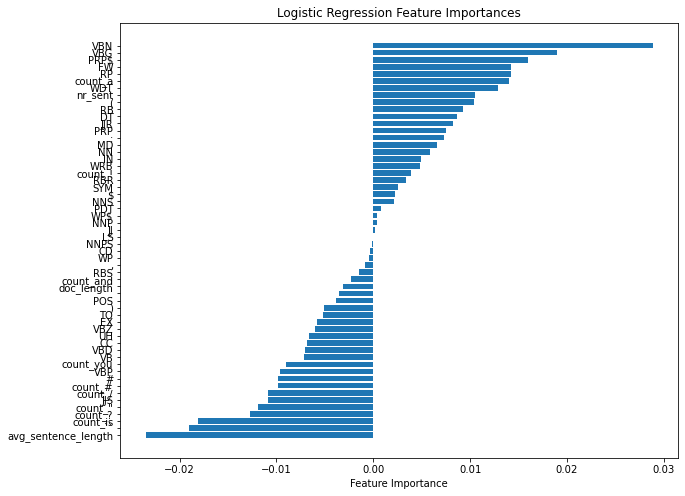

In [34]:
# Plot feature importances
feature_importances = model.coef_[0]
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importances')
plt.show()